## Fitting a Model to Data

This is a quick tutorial to explain how to fit a simple, arbitrary model to data in python via chi-square minimization.  The basic idea is that if we have some model that's a function of parameters p, we want to determine the best-fit parameters p by comparing to the data, D.  We can do that by minimizing the residuals, i.e. for the ith data point:

$f_i = (D_i - p)/ \sigma_i $

For the time being we don't have any uncertainties so we'll ignore the $\sigma_i$ term.

With those residuals, we're then going to use Scipy to minimize the sum of squares $\Sigma_i f_i^2$, but scipy includes an extra "loss function" to minimize the impact of large outliers (this doesn't actually matter for us, we have two data points so there are no outliers!).

In [1]:
# prelims
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import least_squares

Now let's set up a simple model and fit it to data:

<ErrorbarContainer object of 3 artists>

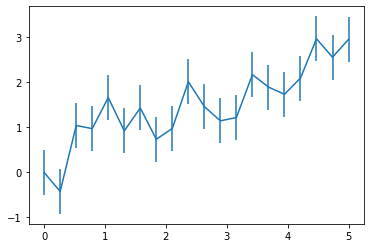

In [2]:
# just a line, with some noise
x = np.linspace(0,5,20)
y = 0.5*x + 0.25
y += np.random.normal(size=20)*0.5
plt.errorbar(x,y,yerr=0.5)

To use the least_squares function in the most flexible way, we now need to define our own function that builds the residuals f(i) above

In [3]:
def line_fit(p):
    model = p[0]*x + p[1]
    return y - model

result = least_squares(line_fit,[1,1])

In [4]:
# let's see how we did
print(result.message)
result.x

`xtol` termination condition is satisfied.


array([0.47859269, 0.26814765])

So we got a slope of 0.56 and a y-intercept of 0.1 compared to our "true" values, 0.5 and 0.25 - not bad!  We should be able to go above and reduce the errors to do better.  End of demo!